In [11]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set()

In [103]:
df = pd.read_csv("../nation_incremental.csv")
df["date"] = pd.to_datetime(df.date)
df.index = df.date

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 11 entries, 2020-02-25 to 2020-03-06
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   date              11 non-null     datetime64[ns]
 1   hospitalized      11 non-null     int64         
 2   intensive_care    11 non-null     int64         
 3   self_quarantined  11 non-null     int64         
 4   active            11 non-null     int64         
 5   healed            11 non-null     int64         
 6   dead              11 non-null     int64         
 7   total_confirmed   11 non-null     int64         
 8   tested            11 non-null     int64         
dtypes: datetime64[ns](1), int64(8)
memory usage: 880.0 bytes


In [105]:
df = df.drop(columns='date')
df.tail()

,hospitalized,intensive_care,self_quarantined,active,healed,dead,total_confirmed,tested
date,,,,,,,,
2020-03-02,103,26,129,258,66,18,342,2218
2020-03-03,292,63,73,428,11,27,466,2511
2020-03-04,312,66,65,443,116,28,587,3981
2020-03-05,444,56,90,590,138,41,769,2525
2020-03-06,604,111,-95,620,109,49,778,3997


In [106]:
tested = df.tested
df = df.drop(columns='tested')

<Figure size 432x288 with 0 Axes>

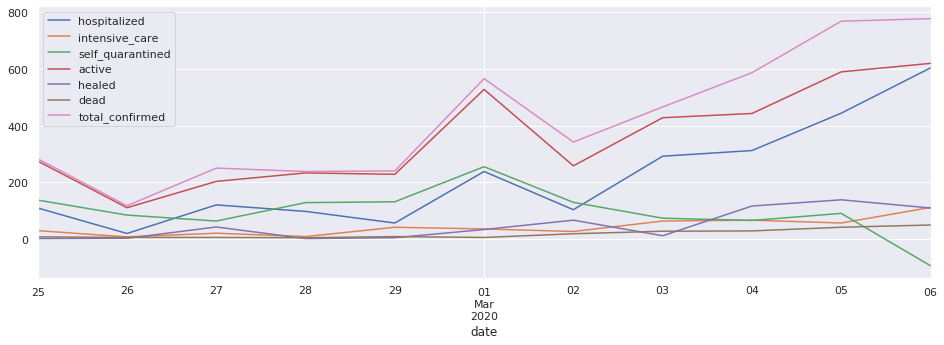

In [107]:
plt.figure()
df.plot(figsize=(16, 5))

In [28]:
df.hospitalized / tested

date
2020-02-25    0.017513
2020-02-26    0.005650
2020-02-27    0.049444
2020-02-28    0.026352
2020-02-29    0.018881
2020-03-01    0.096513
2020-03-02    0.046438
2020-03-03    0.116288
2020-03-04    0.078372
dtype: float64

In [30]:
df.active / tested

date
2020-02-25    0.044184
2020-02-26    0.032709
2020-02-27    0.083642
2020-02-28    0.063298
2020-02-29    0.076871
2020-03-01    0.214112
2020-03-02    0.116321
2020-03-03    0.170450
2020-03-04    0.111279
dtype: float64

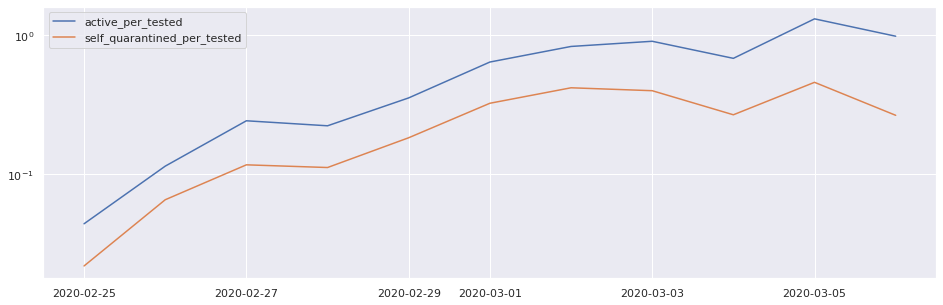

In [108]:
df_cum = df.cumsum()
plt.figure(figsize=(16, 5))
plt.plot(df_cum.index, df_cum.active/tested, label='active_per_tested')
plt.plot(df_cum.index, df_cum.self_quarantined/tested, label='self_quarantined_per_tested')

plt.yscale('log')
plt.legend(loc='best')

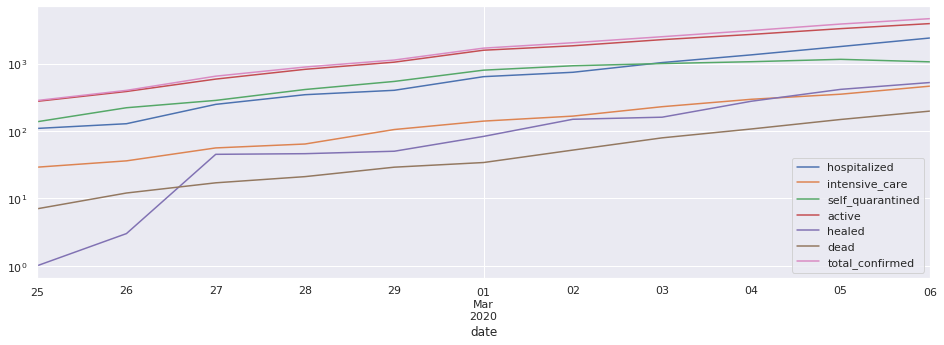

In [109]:
df_cum.plot(figsize=(16, 5), logy=True)

In [110]:
import numpy as np
from scipy.optimize import curve_fit

In [111]:
def f(x, a, b):
    return a * np.exp(b*x)

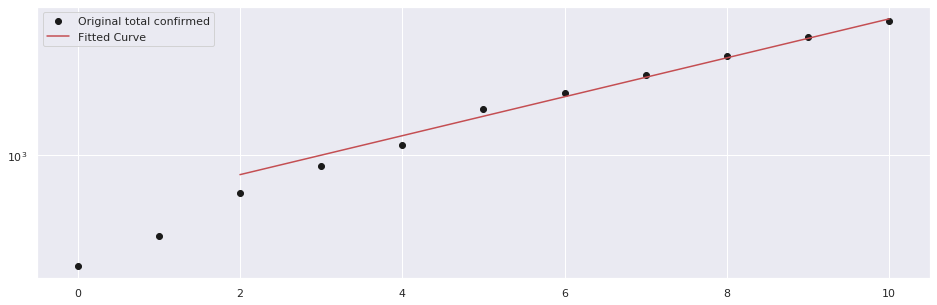

In [112]:
x = np.arange(len(df_cum.index))
popt, pcov = curve_fit(f, x[2:], df_cum.total_confirmed[2:])
plt.figure(figsize=(16, 5))
plt.plot(x, df_cum.total_confirmed, 'ko', label="Original total confirmed")
plt.plot(x[2:], f(x[2:], *popt), 'r-', label="Fitted Curve")
plt.yscale('log')
plt.legend()

In [118]:
f(10, *popt), popt

(4744.063753501335, array([5.14246128e+02, 2.22194738e-01]))

In [114]:
perr = np.diag(pcov)
perr

array([1.28148614e+03, 6.57702229e-05])

In [115]:
df_cum.total_confirmed

date
2020-02-25     283
2020-02-26     400
2020-02-27     650
2020-02-28     888
2020-02-29    1128
2020-03-01    1694
2020-03-02    2036
2020-03-03    2502
2020-03-04    3089
2020-03-05    3858
2020-03-06    4636
Name: total_confirmed, dtype: int64